# CSE 6369 - Spring 2023 - Homework 2 (Actor-Critic)


## Student Name:


## Student ID: 

# Install packages

In [1]:
!pip install gymnasium==0.27.1 -q
!pip install gymnasium[box2d] -q
!pip install moviepy -q
!pip install -U kora -q
!pip install seaborn

# Import libraries

In [2]:
import pickle
import random
import argparse
import moviepy
import matplotlib.pyplot as plt
import seaborn as sns
# from kora.drive import upload_public
# from google.colab import drive

# drive.mount('/content/gdrive')
# %cd gdrive/MyDrive/hw2/

from learning_algorithms import ACTrainer
from utils import seed_everything

# Train an agent

In [ ]:
# set simulation parameters
params = {
    'env_name': 'LunarLander-v2',
    'rng_seed': 6369,
    'n_rollout': 100,
    'n_trajectory_per_rollout': 60,
    'n_critic_iter': 1,
    'n_critic_epoch': 1,
    'hidden_dim': 128,
    'actor_lr': 3e-3,
    'critic_lr': 3e-4,
    'exp_name': 'LunarLander_v2_t0'
}

# Seed RNGs
seed_everything(params['rng_seed'])

# Train agent
trainer = ACTrainer(params)
trainer.run_training_loop()

End of rollout 0: Average trajectory reward is -231.58


# Display Video

In [ ]:
# (ref: https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive)
# Upload video
# url = upload_public('LunarLander/rl-video-episode-0.mp4')
# # Then display it
# from IPython.display import HTML
# HTML(f"""<video src={url} width=500 controls/>""")

# Visualize learning curve

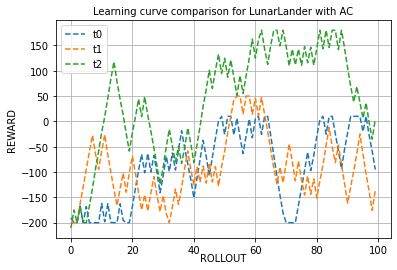

In [3]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Load the rewards data from three different trials
file_names = ['LunarLander_v2' + '_t0.pkl', 'LunarLander_v2' + '_t1.pkl', 'LunarLander_v2' + '_t2.pkl']
rewards_data = []

for file_name in file_names:
    with open(file_name, 'rb') as f:
        rewards = pickle.load(f)
        rewards_data.append(rewards)

# Plot the data for each trial
labels = ['t0', 't1', 't2']
for i, rewards in enumerate(rewards_data):
    sns.lineplot(data=rewards, linestyle='--', label=labels[i])

plt.xlabel('ROLLOUT', fontsize=10, labelpad=-2)
plt.ylabel('REWARD', fontsize=10)
plt.title('Learning curve comparison for LunarLander with AC', fontsize=10)
plt.legend()
plt.grid()
plt.show()